In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import torchio as tio
import nibabel as nib

import torch
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

In [3]:
import os, sys
sys.path.append(os.path.abspath('../src'))

from tagseg.data.acdc_dataset import AcdcDataSet, Patient

In [4]:
acdc_filepath = Path('../data/01_raw/acdc-training')

example = acdc_filepath / 'patient002' / 'patient002_frame01.nii.gz'
example_gt = acdc_filepath / 'patient002' / 'patient002_frame01_gt.nii.gz'

In [5]:
patient_path = str(acdc_filepath / 'patient008')

In [6]:
%%bash -s "$patient_path"
cd $1 && ls -l

total 18080
-rw-r--r-- 1 root root       64 Mar 23 01:20 Info.cfg
-rwxr-x--- 1 root root 17232023 Mar 23 01:20 patient008_4d.nii.gz
-rw-r--r-- 1 root root   626172 Mar 23 01:20 patient008_frame01.nii.gz
-rw-r--r-- 1 root root     6115 Mar 23 01:20 patient008_frame01_gt.nii.gz
-rw-r--r-- 1 root root   626731 Mar 23 01:20 patient008_frame13.nii.gz
-rw-r--r-- 1 root root     5831 Mar 23 01:20 patient008_frame13_gt.nii.gz


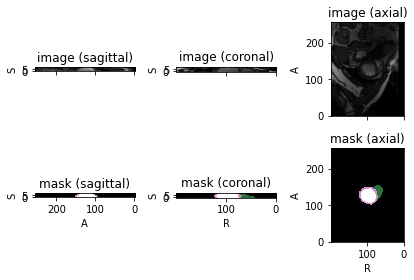

In [7]:
tio.Subject(
    image=tio.ScalarImage(tensor=torch.tensor(nib.load(acdc_filepath / 'patient008' / 'patient008_frame01.nii.gz').get_fdata()[None, ...])),
    mask=tio.LabelMap(tensor=torch.tensor(nib.load(acdc_filepath / 'patient008' / 'patient008_frame01_gt.nii.gz').get_fdata()[None, ...])),
).plot()

In [8]:
patient = Patient(patient_path)

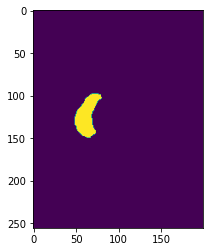

In [28]:
plt.imshow(patient.masks[1][1] == 1)

/opt/conda/envs/tagseg/lib/python3.8/site-packages/matplotlib/backends/backend_pdf.py:1721: DeprecationWarning: NONE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.convert(mode='P', dither=Image.NONE,
/opt/conda/envs/tagseg/lib/python3.8/site-packages/matplotlib/backends/backend_pdf.py:1722: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  palette=Image.ADAPTIVE, colors=num_colors)


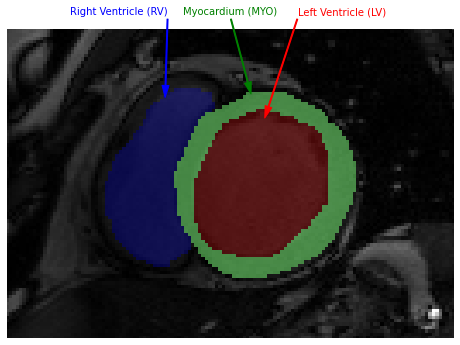

In [77]:
plt.figure(figsize=(8, 8))

plt.imshow(patient.images[1][1], cmap='gray')
plt.imshow(np.ma.masked_where(patient.masks[1][1] == 0, patient.masks[1][1]), cmap='jet', alpha=0.5)
plt.axis('off')
plt.xlim(20, 150)
plt.ylim(170, 80)

rv = tuple(np.array(np.where(patient.masks[1][1] == 1))[:, 21])
myo = tuple(np.array(np.where(patient.masks[1][1] == 2))[:, 1])
lv = tuple(np.array(np.where(patient.masks[1][1] == 3))[:, 21])

plt.annotate('Left Ventricle (LV)', xy=lv[::-1], xycoords='data',
             xytext=(0.75, 1.07), textcoords='axes fraction', color='r',
             arrowprops=dict(color='r', width=1, headwidth=7),
             horizontalalignment='center', verticalalignment='top')

plt.annotate('Myocardium (MYO)', xy=myo[::-1], xycoords='data',
             xytext=(0.5, 1.07), textcoords='axes fraction', color='g',
             arrowprops=dict(color='g', width=1, headwidth=7),
             horizontalalignment='center', verticalalignment='top')

plt.annotate('Right Ventricle (RV)', xy=rv[::-1], xycoords='data', color='b',
             xytext=(0.25, 1.07), textcoords='axes fraction',
             arrowprops=dict(color='b', width=1, headwidth=7),
             horizontalalignment='center', verticalalignment='top')

plt.savefig('../../figures/example-acdc.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
patient.__dict__

{'images': [array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   7.,   6., ...,  35.,  38.,  32.],
          [  0.,   4.,   3., ...,  12.,  54.,  32.],
          ...,
          [  0., 323., 293., ...,   8.,  15.,  14.],
          [  0., 303., 323., ...,  10.,  11.,  17.],
          [  0., 291., 316., ...,  15.,  15.,  19.]],
  
         [[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,  11.,  31.,  13.],
          ...,
          [  0.,   0.,   0., ...,   6.,  19.,  12.],
          [  0.,   0.,   0., ...,  14.,  22.,  13.],
          [  0.,   0.,   0., ...,   8.,  19.,  18.]],
  
         [[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,  44.,  12.,  40.],
          [  0.,   0.,   0., ...,  23.,  18.,  25.],
          [  0.,   0.,   0., ...,  1

In [70]:
# mask = gt[:, :, 0]
# mask = mask.astype(np.float64)

# tt = transforms.ToTensor()
# rs = transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST)

# mask = rs(tt(mask)).unique().numpy()

In [ ]:
# fig, ax = plt.subplots(10, 3, figsize=(15, 30))

# for i in range(10):
#     ax[i, 0].imshow(imt[:, :, i], cmap='gray')
#     ax[i, 1].imshow(gt[:, :, i])
#     ax[i, 2].imshow(sim_gridtag(imt[:, :, i] ** 0.4, 5), cmap='gray')

In [ ]:
# p = Patient(acdc_filepath / 'patient001')

In [12]:
load_args = dict(only_myo=True, filepath_raw='../data/01_raw/acdc-training')
dataset = AcdcDataSet(filepath='../data/03_primary/acdc_train.pt', load_args=load_args).load()

In [13]:
len(dataset)

1828

In [ ]:
len(dataset)

In [ ]:
new_dataset = AcdcDataSet(filepath='../data/03_primary/acdc_train.pt', load_args=load_args)._load_except(**load_args)

In [ ]:
len(new_dataset)

In [ ]:
image, mask = dataset[0]

In [ ]:
image.isnan().sum(), mask.isnan().sum()

In [ ]:
set(label.unique().numpy()).issubset(set([0, 1, 2, 3]))

In [ ]:
not all([_class in [0., 1., 2., 3.] for _class in label.unique()])

In [ ]:
means, stds = zip(*[(img[0][0].mean().item(), img[0][0].std().item()) for img in dataset])

In [ ]:
plt.hist(means[1:])

In [ ]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(dataset[212][0][0, ...], cmap='gray'), ax[0].axis('off')
ax[1].imshow(dataset[212][1][...]), ax[1].axis('off')

plt.show()